In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle CDC "Rare Diseases" data
#
##########################################################################################

In [18]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_XML_RareDiseases_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


--2019-09-15 12:33:23--  https://data.cdc.gov/api/views/dwqk-w36f/rows.xml
Resolving data.cdc.gov (data.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cdc.gov (data.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘rows.xml’

rows.xml                [         <=>        ]   2.29M  1007KB/s    in 2.3s    

2019-09-15 12:33:26 (1007 KB/s) - ‘rows.xml’ saved [2398754]



## Get Data data.gov

Data available at https://data.cdc.gov/api/views/45b4-9j7u/rows.xml



In [68]:
# Download with:
# Info: 
#     https://data.cdc.gov/NNDSS/NNDSS-Table-I-infrequently-reported-notifiable-dis/45b4-9j7u
#


! wget https://data.cdc.gov/api/views/45b4-9j7u/rows.xml
! mv rows.xml ../Data/


--2019-10-03 20:09:06--  https://data.cdc.gov/api/views/45b4-9j7u/rows.xml
Resolving data.cdc.gov (data.cdc.gov)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cdc.gov (data.cdc.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘rows.xml’

rows.xml                [               <=>  ]   2.26M   621KB/s    in 3.7s    

2019-10-03 20:09:11 (621 KB/s) - ‘rows.xml’ saved [2373297]



In [5]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook

#import xml.etree.ElementTree as ET
from lxml import etree as ET

In [69]:
# Adapted from:  https://python-forum.io/Thread-How-to-display-XML-tree-structure-with-Python

def xml_tree_vis(filename):
    import re, collections
    from lxml import etree as ET

    raw_tree = ET.parse(filename)
    xml_root = raw_tree.getroot()      # the top-most node
    nice_tree = collections.OrderedDict()

    for tag in xml_root.iter():
        path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
        if path not in nice_tree:
            nice_tree[path] = []
        if len(tag.keys()) > 0:
            nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            

    for path, attribs in nice_tree.items():
        indent = int(path.count('/') - 1)
        nodename = path.split('/')[-1]
        if len(attribs) > 0:
            attribslist =  ', '.join(attribs)  
        else:
            attribslist = '-'
            
        print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, nodename, attribslist))
        
# Visualize this file's structure
xml_tree_vis('../Data/rows.xml')

0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [13]:
# Notice there are two levels with the tag "row"  This sort of thing is common in 
# XML and really annoying.  
# This sort of display makes it stand out, though.
# We'll need to remember that for later.

In [9]:

#  Read the entire tree into a collection of "nodes"
#  each of which have several associated attributes,
#  possibly including other "child nodes"
#
#  Web browsers can display XML in a relatively
#  easy-to-read way.  Open rows.xml with your browser.

# Open the file in Python: 
tree = ET.parse('../Data/rows.xml')
root = tree.getroot()      # the top-most node


In [70]:
tags=[x for x in root.iter()]
#dir(tags[3])
#dir(tags[2])
#tags[2].attrib['_address']
tags



[<Element response at 0x120d238c8>,
 <Element row at 0x120d237c8>,
 <Element row at 0x120d23788>,
 <Element disease at 0x120d236c8>,
 <Element mmwr_year at 0x1207ffc48>,
 <Element mmwr_week at 0x1207ffdc8>,
 <Element current_week_flag at 0x1207ffd88>,
 <Element cum_2017_flag at 0x1207ffa08>,
 <Element _5_year_weekly_average_flag at 0x1207fff88>,
 <Element total_cases_reported_2016_flag at 0x11005d308>,
 <Element total_cases_reported_2015_flag at 0x1207fff08>,
 <Element total_cases_reported_2014_flag at 0x11005d448>,
 <Element total_cases_reported_2013_flag at 0x11005d488>,
 <Element total_cases_reported_2012_flag at 0x11005d2c8>,
 <Element row at 0x11005dcc8>,
 <Element disease at 0x11005d848>,
 <Element mmwr_year at 0x11005d988>,
 <Element mmwr_week at 0x120d8d208>,
 <Element current_week_flag at 0x120da7a08>,
 <Element cum_2017_flag at 0x120da7ac8>,
 <Element _5_year_weekly_average at 0x120da7048>,
 <Element total_cases_reported_2016 at 0x120da74c8>,
 <Element total_cases_reported_20

In [22]:
# This data seems to be organized by an attribute called "row", each of 
#  which has several children (probably the columns)

In [11]:
# You can see root's child nodes with

for xx in root.iter():
    print(xx)

# This shows all of the children of root, without regard to their position in the tree.
# In this data set, though, we want to parse each row separately.


<Element response at 0x120d238c8>
<Element row at 0x120d237c8>
<Element row at 0x120d23788>
<Element disease at 0x120d236c8>
<Element mmwr_year at 0x1207ffc48>
<Element mmwr_week at 0x1207ffdc8>
<Element current_week_flag at 0x1207ffd88>
<Element cum_2017_flag at 0x1207ffa08>
<Element _5_year_weekly_average_flag at 0x1207fff88>
<Element total_cases_reported_2016_flag at 0x11005d308>
<Element total_cases_reported_2015_flag at 0x1207fff08>
<Element total_cases_reported_2014_flag at 0x11005d448>
<Element total_cases_reported_2013_flag at 0x11005d488>
<Element total_cases_reported_2012_flag at 0x11005d2c8>
<Element row at 0x11005dcc8>
<Element disease at 0x11005d848>
<Element mmwr_year at 0x11005d988>
<Element mmwr_week at 0x120d8d208>
<Element current_week_flag at 0x120da7a08>
<Element cum_2017_flag at 0x120da7ac8>
<Element _5_year_weekly_average at 0x120da7048>
<Element total_cases_reported_2016 at 0x120da74c8>
<Element total_cases_reported_2015 at 0x120da7bc8>
<Element total_cases_repor

<Element current_week_flag at 0x120ddea88>
<Element cum_2017 at 0x120ddeac8>
<Element _5_year_weekly_average at 0x120ddeb08>
<Element total_cases_reported_2016 at 0x120ddeb48>
<Element total_cases_reported_2015 at 0x120ddeb88>
<Element total_cases_reported_2014 at 0x120ddebc8>
<Element total_cases_reported_2013 at 0x120ddec08>
<Element total_cases_reported_2012 at 0x120ddec48>
<Element row at 0x120ddec88>
<Element disease at 0x120ddecc8>
<Element mmwr_year at 0x120dded08>
<Element mmwr_week at 0x120dded48>
<Element current_week at 0x120dded88>
<Element cum_2017 at 0x120ddedc8>
<Element _5_year_weekly_average at 0x120ddee08>
<Element total_cases_reported_2016 at 0x120ddee48>
<Element total_cases_reported_2015 at 0x120ddee88>
<Element total_cases_reported_2014 at 0x120ddeec8>
<Element total_cases_reported_2013_flag at 0x120ddef08>
<Element total_cases_reported_2012_flag at 0x120ddef48>
<Element states_reporting_cases_during_current_week_no at 0x120ddef88>
<Element row at 0x120ddefc8>
<El

<Element _5_year_weekly_average_flag at 0x120e23b08>
<Element total_cases_reported_2016_flag at 0x120e23b48>
<Element total_cases_reported_2015_flag at 0x120e23b88>
<Element total_cases_reported_2014_flag at 0x120e23bc8>
<Element total_cases_reported_2013_flag at 0x120e23c08>
<Element total_cases_reported_2012_flag at 0x120e23c48>
<Element row at 0x120e23c88>
<Element disease at 0x120e23cc8>
<Element mmwr_year at 0x120e23d08>
<Element mmwr_week at 0x120e23d48>
<Element current_week_flag at 0x120e23d88>
<Element cum_2017_flag at 0x120e23dc8>
<Element _5_year_weekly_average_flag at 0x120e23e08>
<Element total_cases_reported_2016_flag at 0x120e23e48>
<Element total_cases_reported_2015_flag at 0x120e23e88>
<Element total_cases_reported_2014_flag at 0x120e23ec8>
<Element total_cases_reported_2013_flag at 0x120e23f08>
<Element total_cases_reported_2012_flag at 0x120e23f48>
<Element row at 0x120e23f88>
<Element disease at 0x120e23fc8>
<Element mmwr_year at 0x120e24048>
<Element mmwr_week at 0

<Element current_week_flag at 0x120e56808>
<Element cum_2017 at 0x120e56848>
<Element _5_year_weekly_average at 0x120e56888>
<Element total_cases_reported_2016 at 0x120e568c8>
<Element total_cases_reported_2015 at 0x120e56908>
<Element total_cases_reported_2014 at 0x120e56948>
<Element total_cases_reported_2013 at 0x120e56988>
<Element total_cases_reported_2012 at 0x120e569c8>
<Element row at 0x120e56a08>
<Element disease at 0x120e56a48>
<Element mmwr_year at 0x120e56a88>
<Element mmwr_week at 0x120e56ac8>
<Element current_week at 0x120e56b08>
<Element cum_2017 at 0x120e56b48>
<Element _5_year_weekly_average at 0x120e56b88>
<Element total_cases_reported_2016 at 0x120e56bc8>
<Element total_cases_reported_2015 at 0x120e56c08>
<Element total_cases_reported_2014 at 0x120e56c48>
<Element total_cases_reported_2013 at 0x120e56c88>
<Element total_cases_reported_2012 at 0x120e56cc8>
<Element states_reporting_cases_during_current_week_no at 0x120e56d08>
<Element row at 0x120e56d48>
<Element dise

<Element cum_2017 at 0x120e7a488>
<Element _5_year_weekly_average at 0x120e7a4c8>
<Element total_cases_reported_2016 at 0x120e7a508>
<Element total_cases_reported_2015 at 0x120e7a548>
<Element total_cases_reported_2014 at 0x120e7a588>
<Element total_cases_reported_2013 at 0x120e7a5c8>
<Element total_cases_reported_2012 at 0x120e7a608>
<Element row at 0x120e7a648>
<Element disease at 0x120e7a688>
<Element mmwr_year at 0x120e7a6c8>
<Element mmwr_week at 0x120e7a708>
<Element current_week at 0x120e7a748>
<Element cum_2017 at 0x120e7a788>
<Element _5_year_weekly_average at 0x120e7a7c8>
<Element total_cases_reported_2016 at 0x120e7a808>
<Element total_cases_reported_2015 at 0x120e7a848>
<Element total_cases_reported_2014 at 0x120e7a888>
<Element total_cases_reported_2013 at 0x120e7a8c8>
<Element total_cases_reported_2012 at 0x120e7a908>
<Element states_reporting_cases_during_current_week_no at 0x120e7a948>
<Element row at 0x120e7a988>
<Element disease at 0x120e7a9c8>
<Element mmwr_year at 0

<Element disease at 0x120e90b08>
<Element mmwr_year at 0x120e90b48>
<Element mmwr_week at 0x120e90b88>
<Element current_week_flag at 0x120e90bc8>
<Element cum_2017_flag at 0x120e90c08>
<Element _5_year_weekly_average_flag at 0x120e90c48>
<Element total_cases_reported_2016_flag at 0x120e90c88>
<Element total_cases_reported_2015_flag at 0x120e90cc8>
<Element total_cases_reported_2014_flag at 0x120e90d08>
<Element total_cases_reported_2013_flag at 0x120e90d48>
<Element total_cases_reported_2012_flag at 0x120e90d88>
<Element row at 0x120e90dc8>
<Element disease at 0x120e90e08>
<Element mmwr_year at 0x120e90e48>
<Element mmwr_week at 0x120e90e88>
<Element current_week_flag at 0x120e90ec8>
<Element cum_2017_flag at 0x120e90f08>
<Element _5_year_weekly_average_flag at 0x120e90f48>
<Element total_cases_reported_2016_flag at 0x120e90f88>
<Element total_cases_reported_2015_flag at 0x120e90fc8>
<Element total_cases_reported_2014_flag at 0x120e91048>
<Element total_cases_reported_2013_flag at 0x12

<Element current_week_flag at 0x120eb5e08>
<Element cum_2017_flag at 0x120eb5e48>
<Element _5_year_weekly_average_flag at 0x120eb5e88>
<Element total_cases_reported_2016_flag at 0x120eb5ec8>
<Element total_cases_reported_2015_flag at 0x120eb5f08>
<Element total_cases_reported_2014_flag at 0x120eb5f48>
<Element total_cases_reported_2013_flag at 0x120eb5f88>
<Element total_cases_reported_2012_flag at 0x120eb5fc8>
<Element row at 0x120eb6048>
<Element disease at 0x120eb6088>
<Element mmwr_year at 0x120eb60c8>
<Element mmwr_week at 0x120eb6108>
<Element current_week_flag at 0x120eb6148>
<Element cum_2017_flag at 0x120eb6188>
<Element _5_year_weekly_average_flag at 0x120eb61c8>
<Element total_cases_reported_2016_flag at 0x120eb6208>
<Element total_cases_reported_2015_flag at 0x120eb6248>
<Element total_cases_reported_2014_flag at 0x120eb6288>
<Element total_cases_reported_2013 at 0x120eb62c8>
<Element total_cases_reported_2012_flag at 0x120eb6308>
<Element row at 0x120eb6348>
<Element disea

<Element total_cases_reported_2016_flag at 0x120eef4c8>
<Element total_cases_reported_2015_flag at 0x120eef508>
<Element total_cases_reported_2014_flag at 0x120eef548>
<Element total_cases_reported_2013_flag at 0x120eef588>
<Element total_cases_reported_2012_flag at 0x120eef5c8>
<Element row at 0x120eef608>
<Element disease at 0x120eef648>
<Element mmwr_year at 0x120eef688>
<Element mmwr_week at 0x120eef6c8>
<Element current_week_flag at 0x120eef708>
<Element cum_2017 at 0x120eef748>
<Element _5_year_weekly_average at 0x120eef788>
<Element total_cases_reported_2016 at 0x120eef7c8>
<Element total_cases_reported_2015 at 0x120eef808>
<Element total_cases_reported_2014 at 0x120eef848>
<Element total_cases_reported_2013_flag at 0x120eef888>
<Element total_cases_reported_2012_flag at 0x120eef8c8>
<Element row at 0x120eef908>
<Element disease at 0x120eef948>
<Element mmwr_year at 0x120eef988>
<Element mmwr_week at 0x120eef9c8>
<Element current_week_flag at 0x120eefa08>
<Element cum_2017 at 0x

<Element mmwr_week at 0x120f2b408>
<Element current_week_flag at 0x120f2b448>
<Element cum_2017 at 0x120f2b488>
<Element _5_year_weekly_average at 0x120f2b4c8>
<Element total_cases_reported_2016 at 0x120f2b508>
<Element total_cases_reported_2015 at 0x120f2b548>
<Element total_cases_reported_2014 at 0x120f2b588>
<Element total_cases_reported_2013 at 0x120f2b5c8>
<Element total_cases_reported_2012 at 0x120f2b608>
<Element row at 0x120f2b648>
<Element disease at 0x120f2b688>
<Element mmwr_year at 0x120f2b6c8>
<Element mmwr_week at 0x120f2b708>
<Element current_week at 0x120f2b748>
<Element cum_2017 at 0x120f2b788>
<Element _5_year_weekly_average at 0x120f2b7c8>
<Element total_cases_reported_2016 at 0x120f2b808>
<Element total_cases_reported_2015_flag at 0x120f2b848>
<Element total_cases_reported_2014_flag at 0x120f2b888>
<Element total_cases_reported_2013_flag at 0x120f2b8c8>
<Element total_cases_reported_2012_flag at 0x120f2b908>
<Element states_reporting_cases_during_current_week_no at 

<Element row at 0x120f52b88>
<Element disease at 0x120f52bc8>
<Element mmwr_year at 0x120f52c08>
<Element mmwr_week at 0x120f52c48>
<Element current_week_flag at 0x120f52c88>
<Element cum_2017 at 0x120f52cc8>
<Element _5_year_weekly_average at 0x120f52d08>
<Element total_cases_reported_2016 at 0x120f52d48>
<Element total_cases_reported_2015 at 0x120f52d88>
<Element total_cases_reported_2014 at 0x120f52dc8>
<Element total_cases_reported_2013 at 0x120f52e08>
<Element total_cases_reported_2012 at 0x120f52e48>
<Element row at 0x120f52e88>
<Element disease at 0x120f52ec8>
<Element mmwr_year at 0x120f52f08>
<Element mmwr_week at 0x120f52f48>
<Element current_week_flag at 0x120f52f88>
<Element cum_2017 at 0x120f52fc8>
<Element _5_year_weekly_average at 0x120f53048>
<Element total_cases_reported_2016 at 0x120f53088>
<Element total_cases_reported_2015 at 0x120f530c8>
<Element total_cases_reported_2014 at 0x120f53108>
<Element total_cases_reported_2013 at 0x120f53148>
<Element total_cases_report

<Element total_cases_reported_2016 at 0x120f83b48>
<Element total_cases_reported_2015 at 0x120f83b88>
<Element total_cases_reported_2014 at 0x120f83bc8>
<Element total_cases_reported_2013 at 0x120f83c08>
<Element total_cases_reported_2012 at 0x120f83c48>
<Element row at 0x120f83c88>
<Element disease at 0x120f83cc8>
<Element mmwr_year at 0x120f83d08>
<Element mmwr_week at 0x120f83d48>
<Element current_week_flag at 0x120f83d88>
<Element cum_2017 at 0x120f83dc8>
<Element _5_year_weekly_average at 0x120f83e08>
<Element total_cases_reported_2016 at 0x120f83e48>
<Element total_cases_reported_2015 at 0x120f83e88>
<Element total_cases_reported_2014 at 0x120f83ec8>
<Element total_cases_reported_2013 at 0x120f83f08>
<Element total_cases_reported_2012 at 0x120f83f48>
<Element row at 0x120f83f88>
<Element disease at 0x120f83fc8>
<Element mmwr_year at 0x120f84048>
<Element mmwr_week at 0x120f84088>
<Element current_week_flag at 0x120f840c8>
<Element cum_2017 at 0x120f84108>
<Element _5_year_weekly_

<Element states_reporting_cases_during_current_week_no at 0x121006d48>
<Element row at 0x121006d88>
<Element disease at 0x121006dc8>
<Element mmwr_year at 0x121006e08>
<Element mmwr_week at 0x121006e48>
<Element current_week_flag at 0x121006e88>
<Element cum_2017_flag at 0x121006ec8>
<Element _5_year_weekly_average_flag at 0x121006f08>
<Element total_cases_reported_2016_flag at 0x121006f48>
<Element total_cases_reported_2015_flag at 0x121006f88>
<Element total_cases_reported_2014_flag at 0x121006fc8>
<Element total_cases_reported_2013_flag at 0x12104d048>
<Element total_cases_reported_2012_flag at 0x12104d088>
<Element row at 0x12104d0c8>
<Element disease at 0x12104d108>
<Element mmwr_year at 0x12104d148>
<Element mmwr_week at 0x12104d188>
<Element current_week_flag at 0x12104d1c8>
<Element cum_2017 at 0x12104d208>
<Element _5_year_weekly_average at 0x12104d248>
<Element total_cases_reported_2016 at 0x12104d288>
<Element total_cases_reported_2015 at 0x12104d2c8>
<Element total_cases_re

<Element total_cases_reported_2014 at 0x121088048>
<Element total_cases_reported_2013 at 0x121088088>
<Element total_cases_reported_2012 at 0x1210880c8>
<Element row at 0x121088108>
<Element disease at 0x121088148>
<Element mmwr_year at 0x121088188>
<Element mmwr_week at 0x1210881c8>
<Element current_week at 0x121088208>
<Element cum_2017 at 0x121088248>
<Element _5_year_weekly_average at 0x121088288>
<Element total_cases_reported_2016 at 0x1210882c8>
<Element total_cases_reported_2015 at 0x121088308>
<Element total_cases_reported_2014 at 0x121088348>
<Element total_cases_reported_2013 at 0x121088388>
<Element total_cases_reported_2012 at 0x1210883c8>
<Element states_reporting_cases_during_current_week_no at 0x121088408>
<Element row at 0x121088448>
<Element disease at 0x121088488>
<Element mmwr_year at 0x1210884c8>
<Element mmwr_week at 0x121088508>
<Element current_week_flag at 0x121088548>
<Element cum_2017_flag at 0x121088588>
<Element _5_year_weekly_average_flag at 0x1210885c8>
<E

In [71]:
## Here's how you iterate through only the nodes called "row"
for xx in root.iter('row'):
    print(xx)


<Element row at 0x120d237c8>
<Element row at 0x120d23788>
<Element row at 0x11005dcc8>
<Element row at 0x120da7708>
<Element row at 0x120da7c08>
<Element row at 0x120da7f88>
<Element row at 0x120da9148>
<Element row at 0x120da9588>
<Element row at 0x120da9888>
<Element row at 0x120da9b88>
<Element row at 0x120da9e88>
<Element row at 0x120dae1c8>
<Element row at 0x120dae4c8>
<Element row at 0x120dae7c8>
<Element row at 0x120daeac8>
<Element row at 0x120daedc8>
<Element row at 0x120daf108>
<Element row at 0x120daf408>
<Element row at 0x120daf708>
<Element row at 0x120dafa08>
<Element row at 0x120dafd08>
<Element row at 0x120db3088>
<Element row at 0x120db33c8>
<Element row at 0x120db36c8>
<Element row at 0x120db39c8>
<Element row at 0x120db3cc8>
<Element row at 0x120db3fc8>
<Element row at 0x120db1308>
<Element row at 0x120db1648>
<Element row at 0x120db1948>
<Element row at 0x120db1c88>
<Element row at 0x120db1fc8>
<Element row at 0x120da8308>
<Element row at 0x120da8608>
<Element row a

<Element row at 0x120eb0188>
<Element row at 0x120eb0488>
<Element row at 0x120eb0788>
<Element row at 0x120eb0a88>
<Element row at 0x120eb0d88>
<Element row at 0x120eb10c8>
<Element row at 0x120eb13c8>
<Element row at 0x120eb16c8>
<Element row at 0x120eb19c8>
<Element row at 0x120eb1cc8>
<Element row at 0x120eb1fc8>
<Element row at 0x120eb2308>
<Element row at 0x120eb2608>
<Element row at 0x120eb2908>
<Element row at 0x120eb2c08>
<Element row at 0x120eb2f08>
<Element row at 0x120eb3288>
<Element row at 0x120eb3588>
<Element row at 0x120eb3888>
<Element row at 0x120eb3b88>
<Element row at 0x120eb3e88>
<Element row at 0x120eb41c8>
<Element row at 0x120eb44c8>
<Element row at 0x120eb47c8>
<Element row at 0x120eb4ac8>
<Element row at 0x120eb4dc8>
<Element row at 0x120eb5108>
<Element row at 0x120eb5408>
<Element row at 0x120eb5708>
<Element row at 0x120eb5a08>
<Element row at 0x120eb5d08>
<Element row at 0x120eb6048>
<Element row at 0x120eb6348>
<Element row at 0x120eb6648>
<Element row a

<Element row at 0x121074c88>
<Element row at 0x121074f88>
<Element row at 0x121075308>
<Element row at 0x121075608>
<Element row at 0x121075908>
<Element row at 0x121075c08>
<Element row at 0x121075f08>
<Element row at 0x121076248>
<Element row at 0x121076548>
<Element row at 0x121076888>
<Element row at 0x121076b88>
<Element row at 0x121076e88>
<Element row at 0x1210771c8>
<Element row at 0x1210774c8>
<Element row at 0x1210777c8>
<Element row at 0x121077ac8>
<Element row at 0x121077dc8>
<Element row at 0x121078108>
<Element row at 0x121078448>
<Element row at 0x121078788>
<Element row at 0x121078a88>
<Element row at 0x121078d88>
<Element row at 0x1210790c8>
<Element row at 0x121079408>
<Element row at 0x121079708>
<Element row at 0x121079a08>
<Element row at 0x121079d08>
<Element row at 0x12107a048>
<Element row at 0x12107a348>
<Element row at 0x12107a648>
<Element row at 0x12107a948>
<Element row at 0x12107ac88>
<Element row at 0x12107af88>
<Element row at 0x12107b2c8>
<Element row a

In [72]:
##################################################################################################################
#
# YouDo:
#
#   You'd like to generate a list of all the diseases on this list.  There are several ways to do this,
#   but unlike the "row" nodes, the data seems to consistently use the element name "disease".
#
#   1) Generate a list of all nodes called "disease" 
#
#######################################  BEGIN STUDENT CODE  #####################################################

diseases = list(root.iter('disease'))

#######################################   END STUDENT CODE   #####################################################


In [73]:
# These nodes have various attributes which you can view like this:
dir(diseases[0])


['__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'clear',
 'cssselect',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'itersiblings',
 'itertext',
 'keys',
 'makeelement',
 'nsmap',
 'prefix',
 'remove',
 'replace',
 'set',
 'sourceline',
 'tag',
 'tail',
 'text',
 'values',
 'xpath']

In [80]:
# One of the key attribtues is the "text" attribute which contains the
# disease names we're looking for.
#
diseases[3].text

'Arboviral diseases¶,** Jamestown Canyon virus disease'

In [83]:


##################################################################################################################
#
# YouDo:
#
# 1) Loop through the list of nodes and extract the text attribute of each node into a list called diz
#    
#   Stretch goal:  do this with a list comprehension
#
# 2) Make a second list called udiz containing only the unique members of this data set 

#######################################  BEGIN STUDENT CODE  #####################################################

# 1)
diz = [xx.text for xx in diseases]
#print(diz)
#2)

#udiz = list(set(diz))
#udiz.sort()
#udiz

udiz = {xx.text for xx in diseases}
udiz
#######################################   END STUDENT CODE   #####################################################

{'Anthrax',
 'Arboviral diseases¶,** Chikungunya virus disease',
 'Arboviral diseases¶,** Chikungunya virus††',
 'Arboviral diseases¶,** Eastern equine encephalitis virus ',
 'Arboviral diseases¶,** Eastern equine encephalitis virus disease',
 'Arboviral diseases¶,** Jamestown Canyon virus disease',
 'Arboviral diseases¶,** Jamestown Canyon virus§§ ',
 'Arboviral diseases¶,** La Crosse virus disease',
 'Arboviral diseases¶,** La Crosse virus§§ ',
 'Arboviral diseases¶,** Powassan virus ',
 'Arboviral diseases¶,** Powassan virus disease',
 'Arboviral diseases¶,** St. Louis encephalitis virus ',
 'Arboviral diseases¶,** St. Louis encephalitis virus disease',
 'Arboviral diseases¶,** Western equine encephalitis virus ',
 'Arboviral diseases¶,** Western equine encephalitis virus disease',
 'Botulism, foodborne',
 'Botulism, infant',
 'Botulism, other (wound and unspecified)',
 'Botulism, total',
 'Brucellosis',
 'Chancroid',
 'Cholera',
 'Cyclosporiasis**',
 'Diphtheria',
 'Haemophilus inf

In [17]:

# This data set uses a column called cum_2017 to report the cumulative number of reports of that disease
# in 2017
##################################################################################################################
#
# YouDo:
# Generate a list of the top 5 most reported of these diseases in 2017 and the number of reports of each
#
# Note: This is a pain without using Pandas.   Give it a go and see how far you get in 30 minutes.
#       After that, feel free to abandon it and use Pandas in the cell below.
#
#######################################  BEGIN STUDENT CODE  #####################################################

reports = dict()

for row in root.iter('disease'):
    parent = row.getparent()
    this_diz = parent.find('disease').text
    this_cum2017 = parent.find('cum_2017')

    if this_cum2017 is None:
        this_count = 0
    else:
        this_count = int(this_cum2017.text)
        
    #reports.append('{}:{}'.format(str(this_count).ljust(5), this_diz))
    if this_diz not in reports.keys():
        reports[this_diz] = this_count
        
    elif this_count > reports[this_diz]:
        reports[this_diz] = this_count
    
def keys_with_max_n_vals(d,n=1):
    """ 
    a) create a list of the dict's keys and values; 
    b) return the key with the max value
    """  
    v=list(d.values())
    k=list(d.keys())
    return [(xx, k[v.index(xx)]) for xx in sorted(v,reverse=True)[:n]]

keys_with_max_n_vals(reports,5)

#######################################   END STUDENT CODE   #####################################################

[(1091, 'Cyclosporiasis**'),
 (731, 'Listeriosis'),
 (589, 'Syphilis, congenital¶¶¶'),
 (444, 'Zika virus disease, non-congenital††††  '),
 (335, 'Typhoid fever (caused by Salmonella typhi)')]

In [18]:
##################################################################################################################
#
# YouDo:  If you abandoned hope above, try reading the reports dictionary into a data frame, try importing
# reports into a data frame and sorting it.

#######################################  BEGIN STUDENT CODE  #####################################################

df = pd.DataFrame([reports.keys(), reports.values()]).T
df.columns=['Disease','Counts']
df.sort_values('Counts',ascending=False,inplace=True)
df.iloc[:5,:]



#######################################   END STUDENT CODE   #####################################################

Disease Counts
15                            Cyclosporiasis**   1091
28                                 Listeriosis    731
46                     Syphilis, congenital¶¶¶    589
63    Zika virus disease, non-congenital††††      444
50  Typhoid fever (caused by Salmonella typhi)    335

# The Pandas Way

In [90]:


#import xml.etree.ElementTree as ET
import xmltodict
#import json

tree = ET.parse('../Data/rows.xml')
xml_data = tree.getroot()

xmlstr = ET.tostring(xml_data, encoding='ascii', method='xml')


data_dict = dict(xmltodict.parse(xmlstr))

#print(data_dict.keys())

print(data_dict['response']['row']['row'])

[OrderedDict([('@_id', 'row-skhd-7gcj-bknc'), ('@_uuid', '00000000-0000-0000-8068-71B30911A10A'), ('@_position', '0'), ('@_address', 'https://data.cdc.gov/resource/_45b4-9j7u/row-skhd-7gcj-bknc'), ('disease', 'Anthrax'), ('mmwr_year', '2017'), ('mmwr_week', '1'), ('current_week_flag', '-'), ('cum_2017_flag', '-'), ('_5_year_weekly_average_flag', '-'), ('total_cases_reported_2016_flag', '-'), ('total_cases_reported_2015_flag', '-'), ('total_cases_reported_2014_flag', '-'), ('total_cases_reported_2013_flag', '-'), ('total_cases_reported_2012_flag', '-')]), OrderedDict([('@_id', 'row-vyec_dmte-gwmz'), ('@_uuid', '00000000-0000-0000-F7D9-05250D543B3D'), ('@_position', '0'), ('@_address', 'https://data.cdc.gov/resource/_45b4-9j7u/row-vyec_dmte-gwmz'), ('disease', 'Arboviral diseases¶,** Chikungunya virus disease'), ('mmwr_year', '2017'), ('mmwr_week', '1'), ('current_week_flag', '-'), ('cum_2017_flag', '-'), ('_5_year_weekly_average', '6'), ('total_cases_reported_2016', '167'), ('total_case

In [91]:
# Data Dict will reflect the structure 
#  The visualization helps
# Notice that the first of dict_keys is "response"
# which is the same as the "root" of the xml tree
#
xml_tree_vis('../Data/rows.xml')


0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [153]:
# We need to get down to the second level of "row"
#
##################################################################################################################
#
# YouDo: 
# Uncomment the following and look at them in turn
#print(data_dict['response'])
#print(data_dict['response']['row'])
#print(data_dict['response']['row']['row'])

In [92]:
# Once we get to here:
#    data_dict['response']['row']['row']
# We start to get data that looks like actual rows.
# We can make a data frame from this:
df2 = pd.DataFrame(data_dict['response']['row']['row'])

In [24]:
df2

@_id                                @_uuid @_position  \
0     row-skhd-7gcj-bknc  00000000-0000-0000-8068-71B30911A10A          0   
1     row-vyec_dmte-gwmz  00000000-0000-0000-F7D9-05250D543B3D          0   
2     row-hdxc_43ap~n6yz  00000000-0000-0000-0F1A-DE0D93986652          0   
3     row-t9wt_thhz_94py  00000000-0000-0000-E750-7726E41C0121          0   
4     row-bkgt~e7aa.8vhi  00000000-0000-0000-84F0-A42719F7BCF1          0   
5     row-sztx_txbm~vsg3  00000000-0000-0000-0260-B2410C02B184          0   
6     row-6khc.wagz.utpy  00000000-0000-0000-7A43-62A153C6B72D          0   
7     row-m6tc.gzn9-t86m  00000000-0000-0000-6D21-E71EC58407C8          0   
8     row-jvcs.f8as_zyzq  00000000-0000-0000-44B9-61BBB6C622D9          0   
9     row-xt2k~2xxr_tuwm  00000000-0000-0000-040A-FF5C29A3DC04          0   
10    row-nf2e-8fif_cfac  00000000-0000-0000-1FF7-41FA44F00D0B          0   
11    row-qdbs~rqa6-ruar  00000000-0000-0000-F87A-838BEE986BBA          0   
12    row-pzph_v3tt_g3rg  00000000-0000-0000-31FD-78B00B928695          0   
13    row-mhbe~v89c.cnjk  00000000-0000-0000-F9B9-8624DC9A60CD          0   
14    row-3wbu.ndx2-r8q5  00000000-0000-0000-B52C-F6A3228141F2          0   
15    row-vn9y~6t3a~xv9z  00000000-0000-0000-A4AD-EAEC84A92FC9          0   
16    row-cd6y.cxzv_tcih  00000000-0000-0000-F7B1-5029854E19B6          0   
17    row-ir6p-udib~p59j  00000000-0000-0000-34C9-65D2BEB7DDFB          0   
18    row-f7g4.25fb.8sd2  00000000-0000-0000-646B-744CD3CC2399          0   
19    row-52vi_b7p5.27uc  00000000-0000-0000-C66C-212F2E3D8CA9          0   
20    row-bkuw.qtg6~rm7n  00000000-0000-0000-1B81-27A50325D4D6          0   
21    row-bs28-6pbn~i9yn  00000000-0000-0000-34D1-3A31DD1002A9          0   
22    row-z25n-kac7.mwxk  00000000-0000-0000-A76A-06F760E93648          0   
23    row-7v5g~65x8.mzrz  00000000-0000-0000-501D-E5A505986B11          0   
24    row-kqky-zpbq~fpa8  00000000-0000-0000-944B-59DA4144BB61          0   
25    row-2qxw_qqj4~tdbf  00000000-0000-0000-083A-097F41D62E9C          0   
26    row-3uxb.eff5~2kfk  00000000-0000-0000-498E-97022E427B4B          0   
27    row-htes-wr8u.xjpx  00000000-0000-0000-3275-DAFF7AF697F4          0   
28    row-ju49.edym_g3es  00000000-0000-0000-BFAD-F5ADB4CF47E9          0   
29    row-nums~qyfc.4a36  00000000-0000-0000-9AB4-3A0C3FDF9A85          0   
...                  ...                                   ...        ...   
3299  row-s52s-ypcp_3cpe  00000000-0000-0000-91FC-2532E20C83E1          0   
3300  row-pv44_hsps_vt9r  00000000-0000-0000-D53F-1D52785C6C15          0   
3301  row-gdca_hjct.s6uw  00000000-0000-0000-C36C-CE2BE96A1888          0   
3302  row-w72h_ucxj~y9bg  00000000-0000-0000-C76D-AAB7C769A05A          0   
3303  row-mq5i.48wk-ikgv  00000000-0000-0000-0521-C09E6095ED4D          0   
3304  row-ukfd_sgz2-ac8j  00000000-0000-0000-B104-F27E07F75BBC          0   
3305  row-peiq_i83r-ih4a  00000000-0000-0000-3BBF-E04E7A53DA13          0   
3306  row-sddt.5wja_k35j  00000000-0000-0000-0ACF-81357BBB17E1          0   
3307  row-vrvm_2dvg.egmu  00000000-0000-0000-D732-F13A48650C8F          0   
3308  row-67cm.57sp.n49v  00000000-0000-0000-EBD7-079AF3235027          0   
3309  row-7vnd.md8u.i7bq  00000000-0000-0000-F440-BAA783D0B16F          0   
3310  row-jgen-6kgs-92gh  00000000-0000-0000-2719-7FCB281739EE          0   
3311  row-jg2i.byh6_jzi9  00000000-0000-0000-0607-DAC1C108945D          0   
3312  row-fcyc.idak.b893  00000000-0000-0000-69BB-C11610D9D094          0   
3313  row-mei8~b9vn~iwku  00000000-0000-0000-69A6-54C11F054932          0   
3314  row-3n4a.36g6~fufs  00000000-0000-0000-13CC-BDB9749D521C          0   
3315  row-pc46_jx5g.hg26  00000000-0000-0000-13BA-F67A11949237          0   
3316  row-xut2~ebaf_b2cn  00000000-0000-0000-98C7-41A80FA80253          0   
3317  row-z3dr~9v3c.vp3r  00000000-0000-0000-50FE-3938E80D7ACB          0   
3318  row-8n6x~62kt~cnf4  00000000-0000-0000-7493-1F183576EDE5          0   
3319  row-2kzg_z

<IPython.core.display.Javascript object>


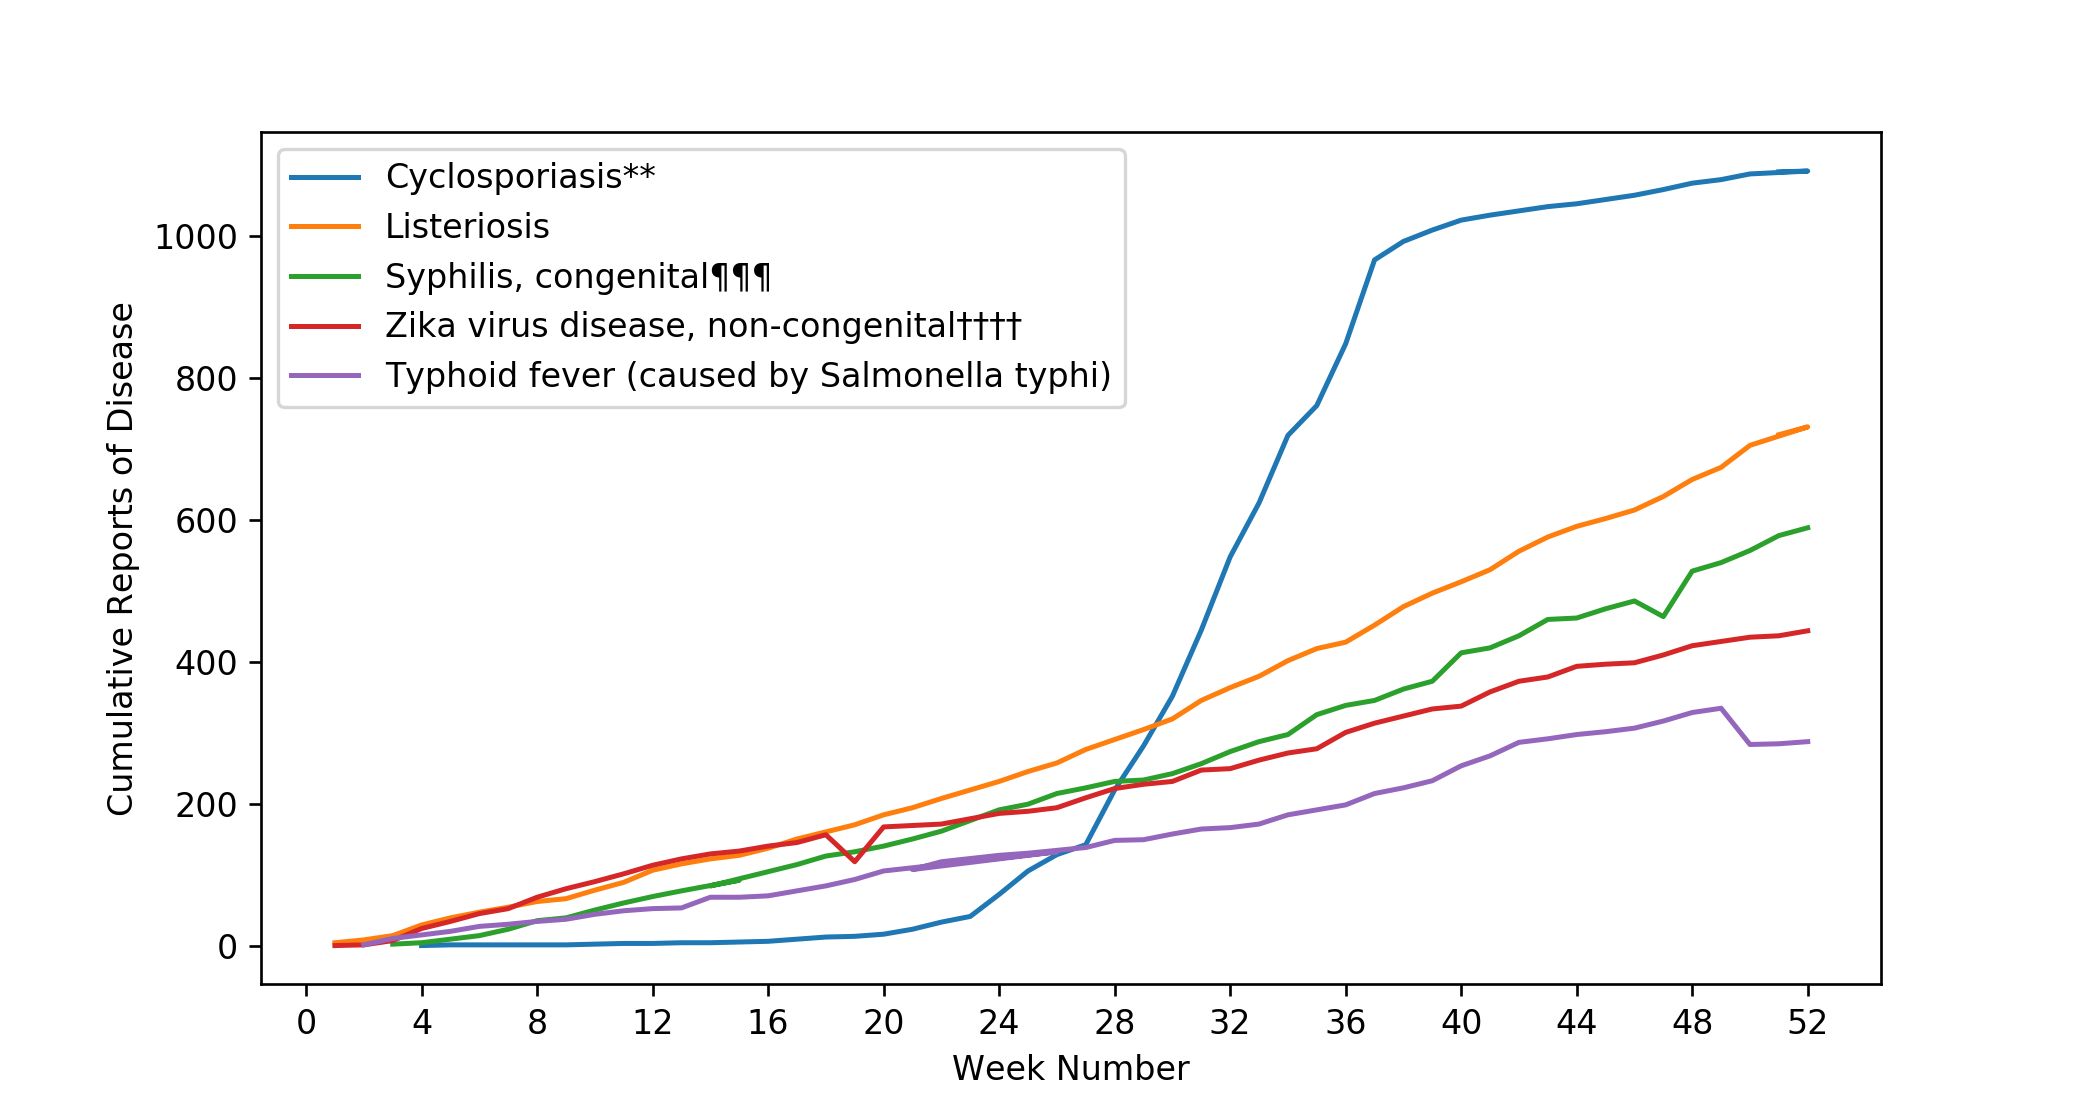

In [95]:
##################################################################################################################
#
# YouDo: 
#  Make a visualization showing week vs cum_2017 for all of the top 5 diseases
#  Ensure it has appropriate labels, etc. for pulblication
#######################################  BEGIN STUDENT CODE  #####################################################
%matplotlib notebook
fig, ax  = plt.subplots()

for diz in df.iloc[:5,:].Disease:
    this_diz = df2[[xx.startswith(diz.strip()) for xx in df2.disease]]
    this_diz.sort_values('cum_2017')
    ax.plot([float(xx) for xx in this_diz.mmwr_week], [float(xx) for xx in this_diz.cum_2017], label=diz)
    
plt.legend()
plt.xlabel('Week Number')
plt.ylabel('Cumulative Reports of Disease')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
#######################################   END STUDENT CODE   #####################################################